In [79]:
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

#### Ques1

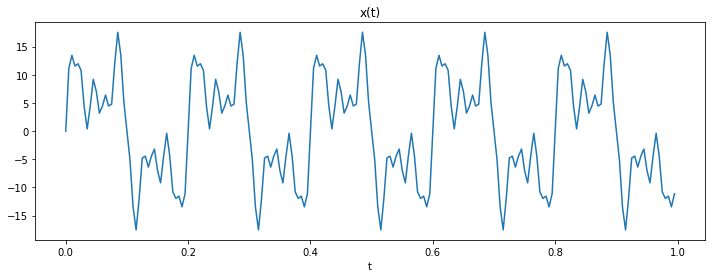

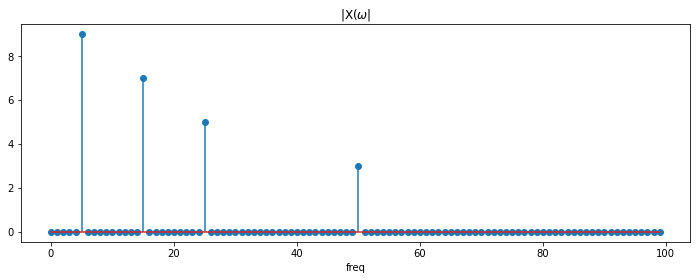

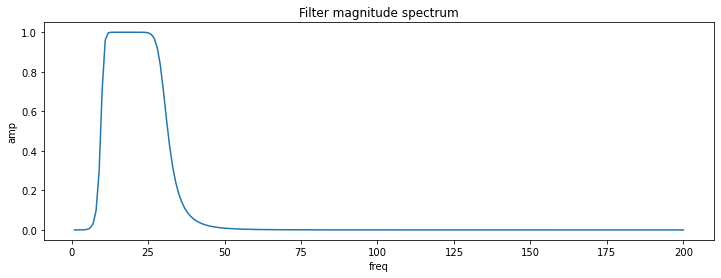

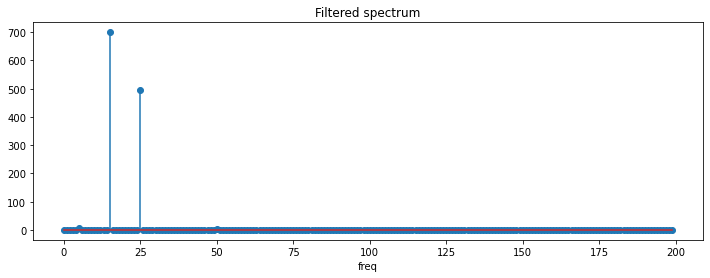

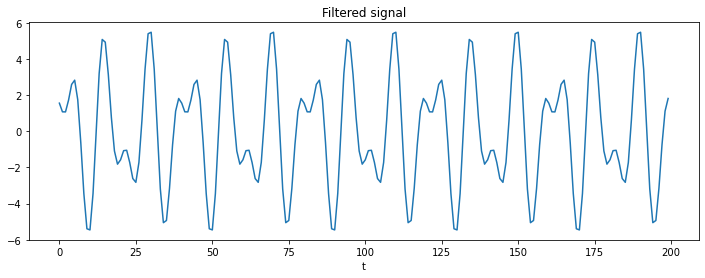

In [287]:
f1,f2,f3,f4=5,15,25,50
fs=200
ts=1/fs
t=np.arange(0,1,ts)
xt=(9*np.sin(2*np.pi*f1*t))+(7*np.sin(2*np.pi*f2*t))+(5*np.sin(2*np.pi*f3*t))+(3*np.sin(2*np.pi*f4*t))
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(t,xt)
plt.xlabel('t')
plt.title('x(t)')
plt.show()

def DFT(x):
    N=len(x)
    n=np.arange(N)
    k=n.reshape((N,1))
    e=np.exp(np.complex(0,-2)*np.pi*k*n/N)
    X=np.dot(e,x)
    return X

Xt=DFT(xt)
N=len(Xt)
n=np.arange(N)
#plt.stem(n,abs(Xt))
#plt.xlabel('freq')
# plt.title('|X($\omega$|')
# plt.show()

n_o=N//2
f_o=n[:n_o]
X_o=Xt[:n_o]/n_o
plt.stem(f_o,abs(X_o))
plt.xlabel('freq')
plt.title('|X($\omega$|')
plt.show()

from scipy.signal import butter,lfilter
n1,d1=butter(6,[10,30],btype='bandpass',analog='False')
f1, m1 = signal.freqs(n1, d1,worN=np.arange(1,201))
plt.plot(f1,abs(m1))
plt.title('Filter magnitude spectrum')
plt.xlabel('freq')
plt.ylabel('amp')
plt.show()

filsp=Xt*m1
plt.stem(abs(filsp))
plt.xlabel('freq')
plt.title('Filtered spectrum')
plt.show()

filres=ifft(filsp)
plt.plot(filres)
plt.xlabel('t')
plt.title('Filtered signal')
plt.show()

#### Ques2

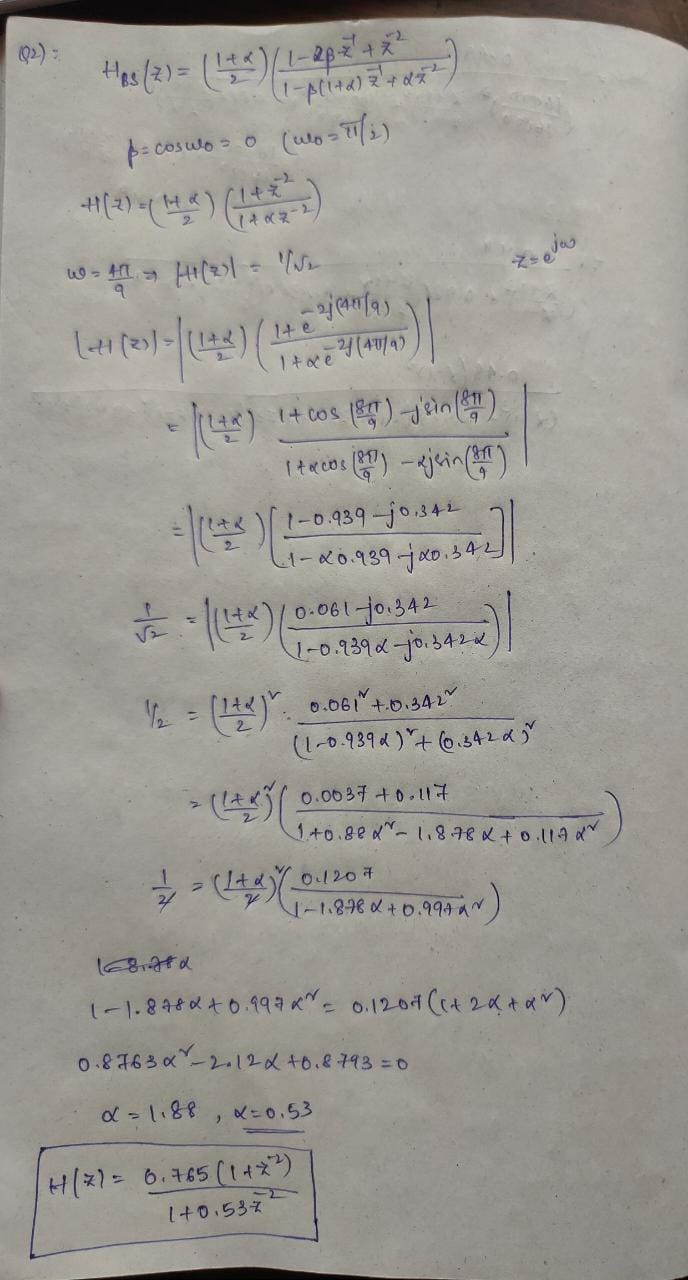

In [279]:
from IPython.display import Image
Image(filename='A5Q2img.jpeg',width=400, height=200)

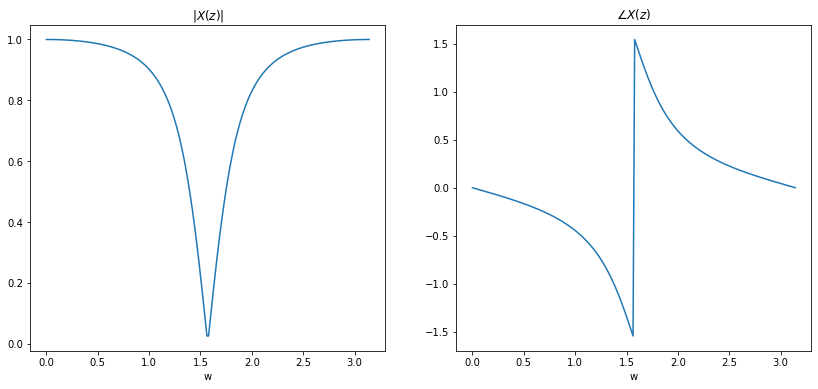

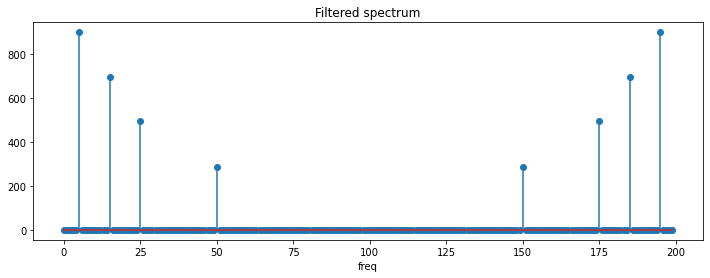

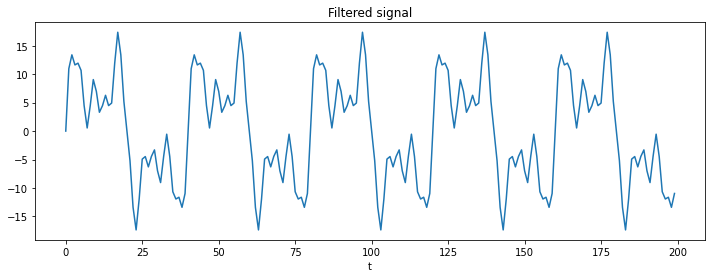

In [303]:
def h2f(w):
    z=np.exp(1j*w)
    num = 0.765*(1+np.power(z,-2))
    den = 1+0.53*np.power(z,-2)
    return num/den
w2=np.linspace(0,np.pi,200)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(w2,abs(h2f(w2)))
plt.xlabel('w')
plt.title(r'$\|X(z)|$')

plt.subplot(122)
plt.plot(w2,np.angle(h2f(w2)))
plt.xlabel('w')
plt.title(r'$\angle X(z)$' )
plt.show()

filsp2=Xt*abs(h2f(w2))
plt.stem(abs(filsp2))
plt.xlabel('freq')
plt.title('Filtered spectrum')
plt.show()

filres2=ifft(filsp2)
plt.plot(filres2)
plt.xlabel('t')
plt.title('Filtered signal')
plt.show()

#### Ques3

In [93]:
from scipy import signal
b=[-0.2,0.18,0.4,1]
a=[1,0.4,0.18,-0.2]
z,p,g=signal.tf2zpk(b,a)
print(z)
print(p)

[ 2.5+0.j         -0.8+1.16619038j -0.8-1.16619038j]
[-0.4+0.58309519j -0.4-0.58309519j  0.4+0.j        ]


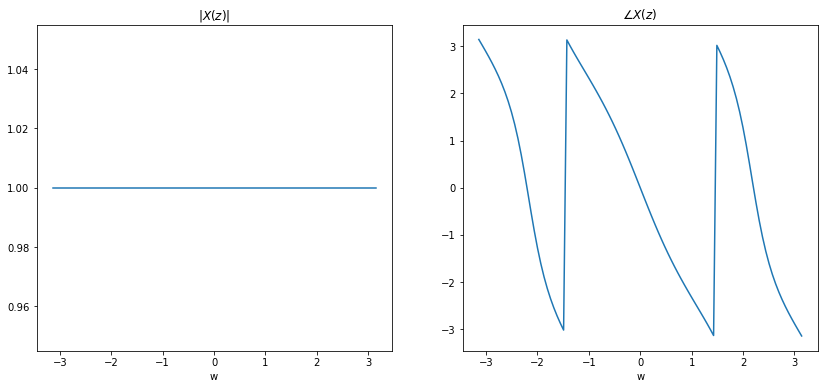

In [147]:
def h3f(w):
    z=np.exp(1j*w)
    num=-0.2+(0.18*np.power(z,-1))+(0.4*np.power(z,-2))+(1*np.power(z,-3))
    den = 1+(0.4*np.power(z,-1))+(0.18*np.power(z,-2))-(0.2*np.power(z,-3))
    return num/den
w3=np.linspace(-np.pi,np.pi,100)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(w3,abs(h3f(w3)))
plt.xlabel('w')
plt.title(r'$\|X(z)|$')

plt.subplot(122)
plt.plot(w3,np.angle(h3f(w3)))
plt.xlabel('w')
plt.title(r'$\angle X(z)$' )
plt.show()

#### Ques4

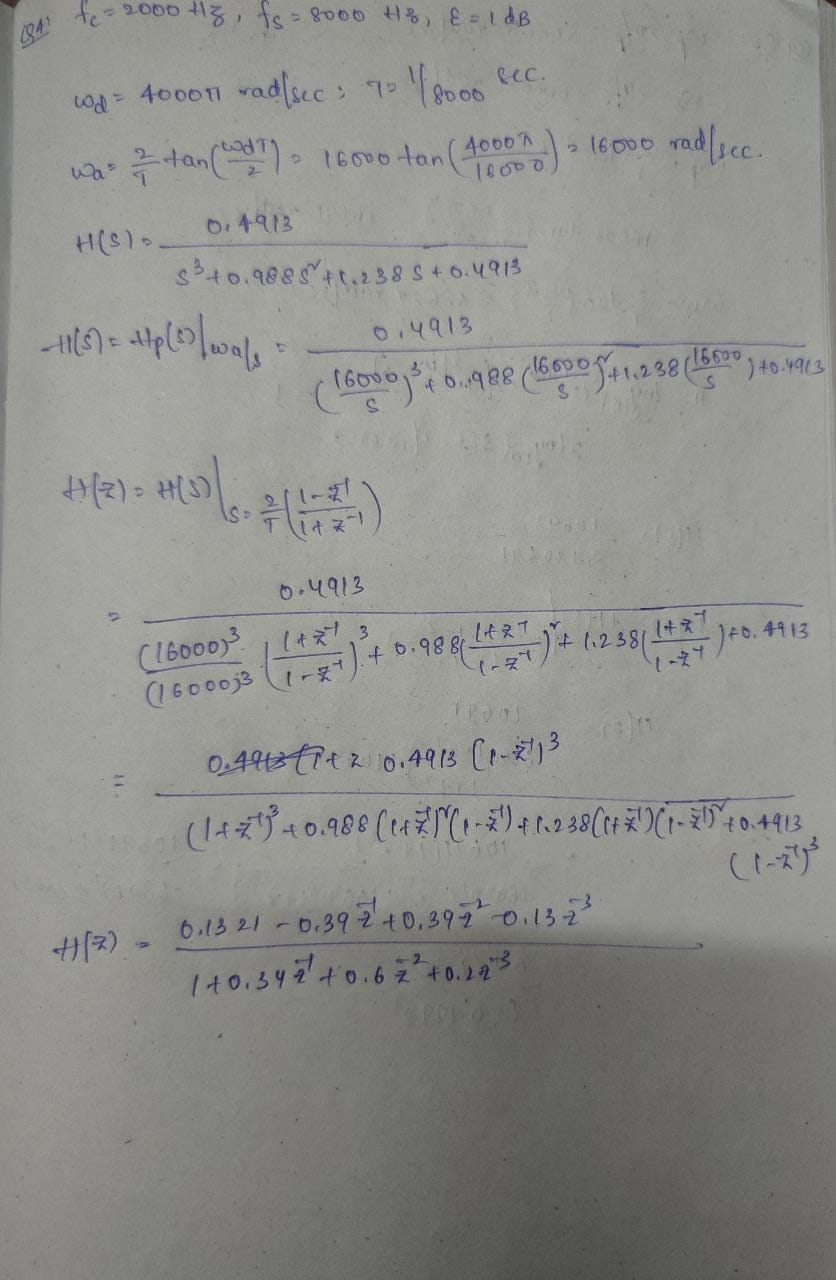

In [317]:
from IPython.display import Image
Image(filename='A5Q4img1.jpeg',width=400, height=200)

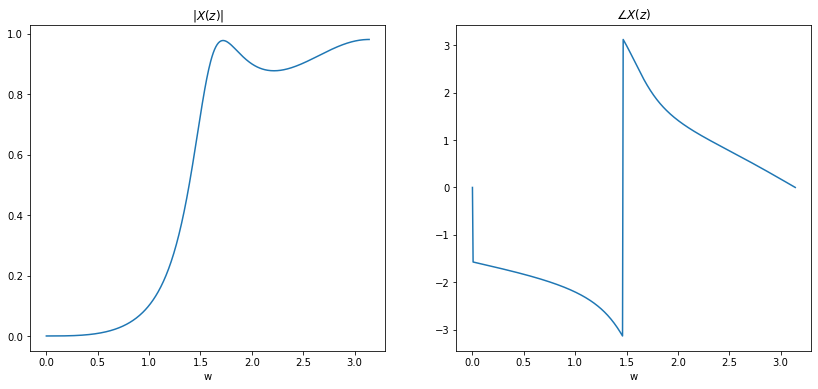

In [315]:
def h4f(w):
    z=np.exp(1j*w)
    num=0.13-0.39*np.power(z,-1)+0.39*np.power(z,-2)-0.13*np.power(z,-3)
    den=1+0.34*np.power(z,-1)+0.6*np.power(z,-2)+0.2*np.power(z,-3)
    return num/den
w4=np.linspace(0,np.pi,500)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(w4,abs(h4f(w4)))
plt.xlabel('w')
plt.title(r'$\|X(z)|$')

plt.subplot(122)
plt.plot(w4,np.angle(h4f(w4)))
plt.xlabel('w')
plt.title(r'$\angle X(z)$' )
plt.show()

#### Ques5

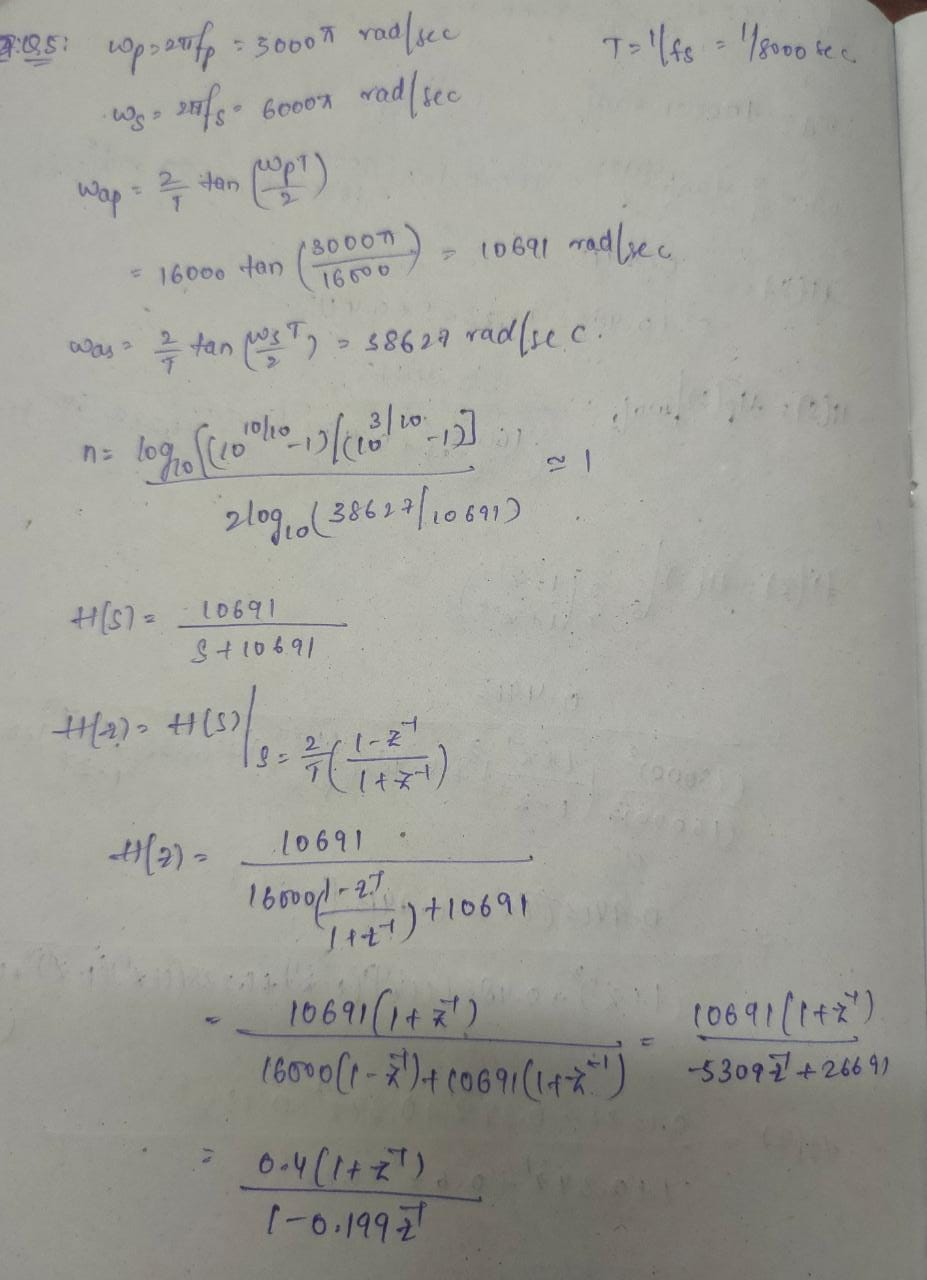

In [316]:
Image(filename='A5Q5img1.jpeg',width=400, height=200)

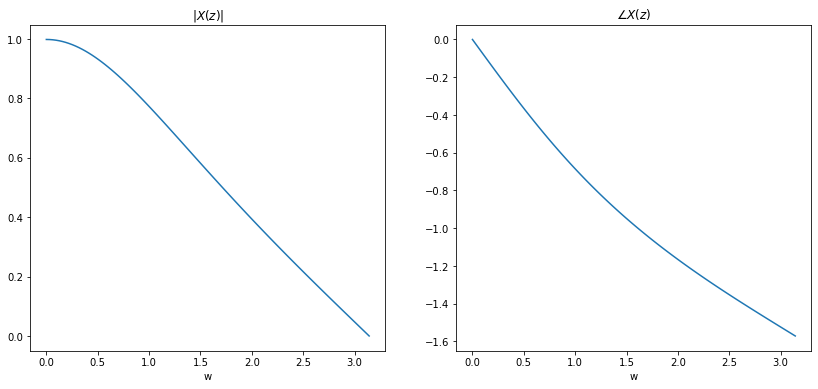

In [306]:
def h5f(w):
    z=np.exp(1j*w)
    num=0.4*(1+np.power(z,-1))
    den=1-0.199*np.power(z,-1)
    return num/den
w5=np.linspace(0,np.pi,100)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(w5,abs(h5f(w5)))
plt.xlabel('w')
plt.title(r'$\|X(z)|$')

plt.subplot(122)
plt.plot(w5,np.angle(h5f(w5)))
plt.xlabel('w')
plt.title(r'$\angle X(z)$' )
plt.show()

#### Ques6

In [221]:
import time
x6n=np.random.randint(low=0,high=20,size=1024)
begtime=time.time()
X6=DFT(x6n)
endtime=time.time()
print(endtime-begtime)

begtime1=time.time()
X6in=np.fft.fft(x6n)
endtime1=time.time()
print(endtime1-begtime1)

0.05200004577636719
0.0009996891021728516


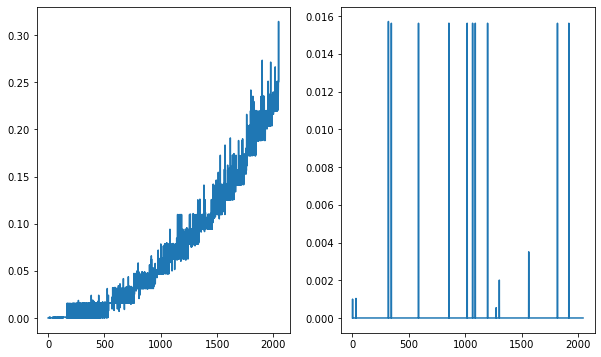

In [223]:
sctime=[]
intime=[]
for i in range(1,2048):
    x6i=np.random.randint(low=0,high=20,size=i)
    
    begtimei=time.time()
    X6i=DFT(x6i)
    endtimei=time.time()
    sctimei=endtimei-begtimei
    sctime.append(sctimei)
    
    begtimei1=time.time()
    X6iin=np.fft.fft(x6i)
    endtimei1=time.time()
    intimei=endtimei1-begtimei1
    intime.append(intimei)
    
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(sctime)
plt.subplot(122)
plt.plot(intime)

#### Ques7

DFT of sequence:
[4.+0.j         1.-2.4142137j  0.+0.j         1.-0.41421357j
 0.+0.j         1.+0.41421357j 0.+0.j         1.+2.4142137j ]
Time taken:  0.0010018348693847656


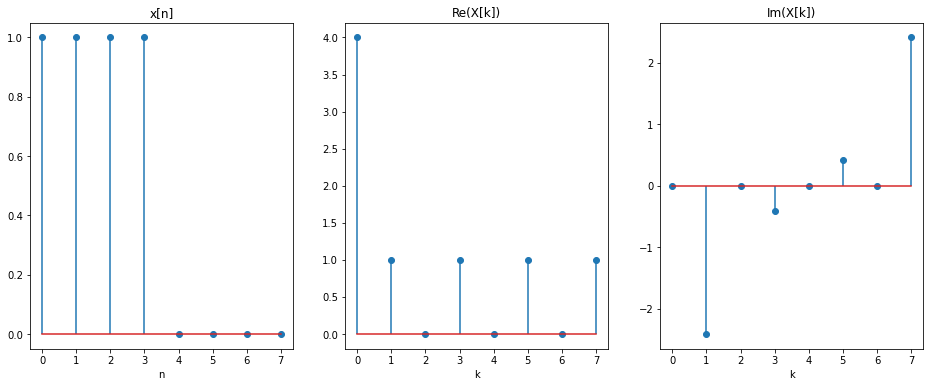

In [243]:
x7n = [1,1,1,1,0,0,0,0]
x1 = np.zeros(len(x7n),dtype=np.complex64)
x2 = x1.copy()
x3 = x1.copy()
w = np.exp(-1j*2*np.pi/len(x))
w0=w**0
w1=w
w2=w**2
w3=w**3

begin = time.time()
# Splitting the data as odd and even
#Stage1
x1[0] = x7n[0] + x7n[4]
x1[1] = x7n[0] - x7n[4]

x1[2] = x7n[2] + x7n[6]
x1[3] = x7n[2] - x7n[6]

x1[4] = x7n[1] + x7n[5]
x1[5] = x7n[1] - x7n[5]

x1[6] = x7n[3] + x7n[7]
x1[7] = x7n[3] - x7n[7]

#Stage2
x2[0] = x1[0] + w0*x1[2]
x2[1] = x1[1] + w2*x1[3]
x2[2] = x1[0] - w0*x1[2]
x2[3] = x1[1] - w2*x1[3]

x2[4] = x1[4] + w0*x1[6]
x2[5] =x1[5] + w2*x1[7]
x2[6] = x1[4] - w0*x1[6]
x2[7] = x1[5] - w2*x1[7]

#Stage3
x3[0] = x2[0] + w0*x2[4]
x3[1] = x2[1] + w1*x2[5]
x3[2] = x2[2] + w2*x2[6]
x3[3] = x2[3] + w3*x2[7]
x3[4] = x2[0] - w0*x2[4]
x3[5] = x2[1] - w1*x2[5]
x3[6] = x2[2] - w2*x2[6]
x3[7] = x2[3] - w3*x2[7]
end = time.time()
tt=end-begin
print('DFT of sequence:')
print(x3)
print('Time taken: ',tt)
#plotting
plt.figure(figsize=(16,6))
plt.subplot(131)
plt.stem(x7n)
plt.xlabel('n')
plt.title('x[n]')

plt.subplot(132)
plt.stem(x3.real)
plt.xlabel('k')
plt.title('Re(X[k])')
         
plt.subplot(133)
plt.stem(x3.imag)
plt.xlabel('k')
plt.title('Im(X[k])')       
plt.show()

In [244]:
q7r=DFT(x7n)
q7r

array([ 4.0000000e+00+0.00000000e+00j,  1.0000000e+00-2.41421356e+00j,
       -1.2246468e-16-1.22464680e-16j,  1.0000000e+00-4.14213562e-01j,
        0.0000000e+00-2.44929360e-16j,  1.0000000e+00+4.14213562e-01j,
        3.6739404e-16-3.67394040e-16j,  1.0000000e+00+2.41421356e+00j])

#### Ques8

DFT
 [4.+0.j         0.+0.j         0.+0.j         0.+0.j
 1.-2.4142137j  1.+0.41421354j 1.-0.41421354j 1.+2.4142137j ]

Time taken:0.0


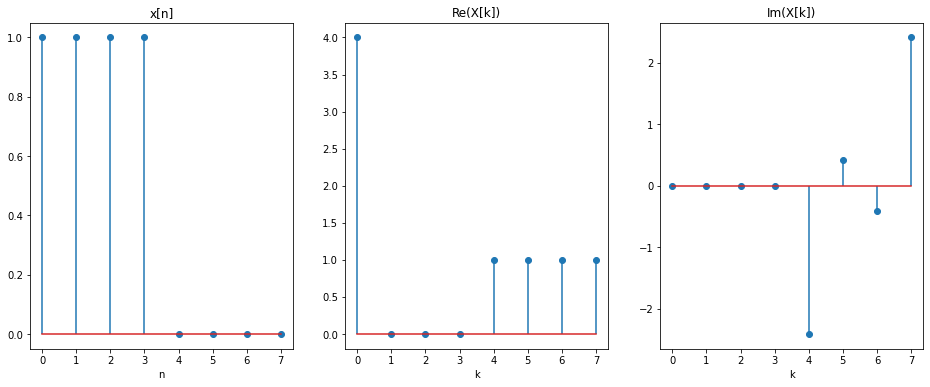

In [270]:
x8n = [1,1,1,1,0,0,0,0]
x8_1 = np.zeros(len(x),dtype=np.complex64)
x8_2 = x1.copy()
x8_3 = x1.copy()


start = time.time()
#Stage1
x8_1[0] = x8n[0] + x8n[4]
x8_1[1] = x8n[1] +x8n[5]
x8_1[2] = x8n[2] + x8n[6]
x8_1[3] = x8n[3] + x8n[7]
x8_1[4] = w0*(x8n[0] - x8n[4])
x8_1[5] = w1*(x8n[1] - x8n[5])
x8_1[6] = w2*(x8n[2] - x8n[6])
x8_1[7] = w3*(x8n[3] - x8n[7])

#Stage2
x8_2[0] = x8_1[0] + x8_1[2]
x8_2[1] = x8_1[1] + x8_1[3]
x8_2[2] = w0*(x8_1[0] - x8_1[2])
x8_2[3] = w2*(x8_1[1] - x8_1[3])

x8_2[4] = x8_1[4] + x8_1[6]
x8_2[5] = x8_1[5] + x8_1[7]
x8_2[6] = w0*(x8_1[4] - x8_1[6])
x8_2[7] = w2*(x8_1[5] - x8_1[7])

#Stage3
x8_3[0] = x8_2[0] + x8_2[1]
x8_3[1] = x8_2[0] - x8_2[1]

x8_3[2] = x8_2[2] + x8_2[3]
x8_3[3] = x8_2[2] - x8_2[3]

x8_3[4] = x8_2[4] + x8_2[5]
x8_3[5] = x8_2[4] - x8_2[5]

x8_3[6] = x8_2[6] + x8_2[7]
x8_3[7] = x8_2[6] - x8_2[7]

stop = time.time()

print('DFT\n',x8_3)

print(f'\nTime taken:{stop-start}')

#plotting
plt.figure(figsize=(16,6))
plt.subplot(131)
plt.stem(x8n)
plt.xlabel('n')
plt.title('x[n]')

plt.subplot(132)
plt.stem(x8_3.real)
plt.xlabel('k')
plt.title('Re(X[k])')

plt.subplot(133)
plt.stem(x8_3.imag)
plt.xlabel('k')
plt.title('Im(X[k])')      
plt.show()

#### Ques9

In [166]:
x9n=[1,2,3,1]
h9n=[1,1,1]
y9ln=np.convolve(x9n,h9n)
print(y9ln)

[1 3 6 6 4 1]


In [211]:
# Function to find circular convolution
def circonvo(x, h):
    maxsize=max(len(x),len(h))
    res=np.zeros(maxsize,dtype='int')
    cirmat=np.zeros((maxsize,maxsize))
    
    rv=np.pad(x,(0,maxsize-len(x)))  # row vector
    cv=np.pad(h,(0,maxsize-len(h)))  # column vector
 
    k = 0
    d = 0
    for i in range(maxsize):
        curIndex = k - d;
        for j in range(maxsize):
            cirmat[j][i] = rv[curIndex % maxsize]
            curIndex += 1
        k = maxsize
        d += 1
    
    #matrix multiplication and result
    for i in range(maxsize):
        for j in range(maxsize):
            res[i] += cirmat[i][j] * cv[j]
            
    return res

cy9n=circonvo(x9n, h9n);
print("Circular Convolution:")
print(cy9n)

#Linear Convolution
N9 = len(x9n)+len(h9n)-1
N1 = N9-len(x9n)
N2 = N9-len(h9n)
x1 =np.pad(x9n,(0,N1))
h1 =np.pad(h9n,(0,N2))

ly9n = np.zeros(N9,dtype='int')

for n in range (N9):
    for k in range (N9):
        if n >= k:
             ly9n[n] = np.round(ly9n[n]+x1[n-k]*h1[k],0)

print("Linear Convolution:")
print(ly9n)

Circular Convolution:
[5 4 6 6]
Linear Convolution:
[1 3 6 6 4 1]


In [212]:
y9f = ifft(np.fft.fft(x9n,max(len(x9n),len(h9n)))*np.fft.fft(h9n,max(len(x9n),len(h9n))))
print(np.round(y9f.real,0))

[5. 4. 6. 6.]
